In [1]:
library(MASS)
library(corrplot)
library(car)

corrplot 0.90 loaded

Loading required package: carData



In [2]:
car <- read.csv('carparts.txt', sep='\t')
head(car)

,sales,outlet,users,income,year,manager
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,37.702,"1,739",9.27,85.4,3.5,9
2,24.196,"1,224",5.86,60.7,5.0,5
3,32.055,"1,846",8.81,68.1,4.4,7
4,3.611,120,3.81,20.2,4.0,5
5,17.625,"1,096",10.31,33.8,3.5,7
6,45.919,"2,290",11.62,95.1,4.1,13


# 상관분석 하기

In [3]:
car$outlet <- as.character(car$outlet)
car$outlet <- gsub(',', '', car$outlet)
car$outlet <- as.integer(car$outlet)


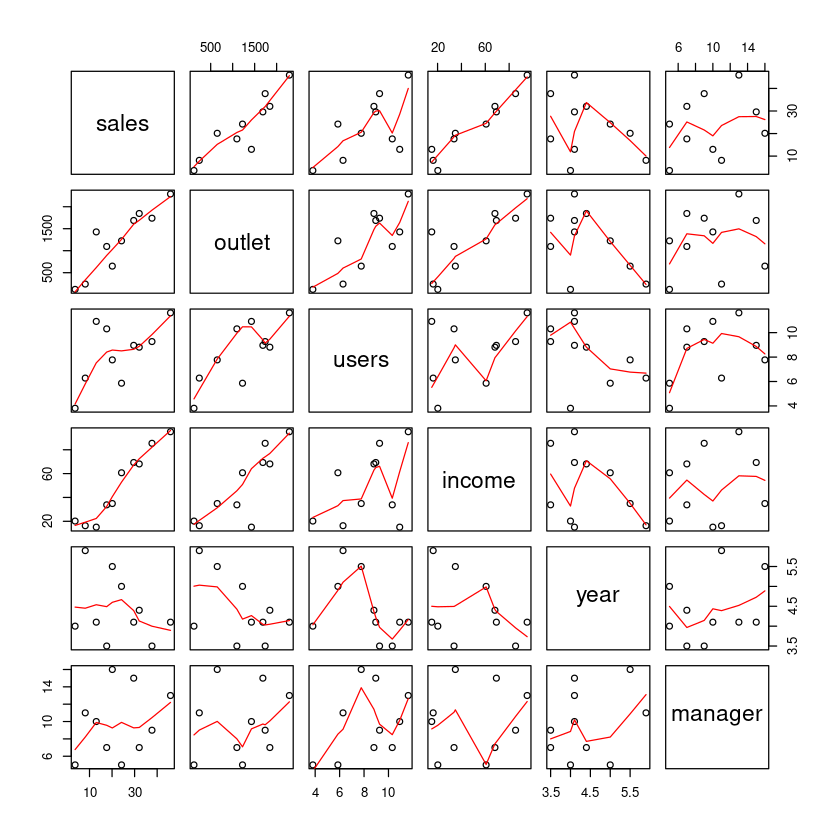

In [4]:
pairs(car, panel=panel.smooth)

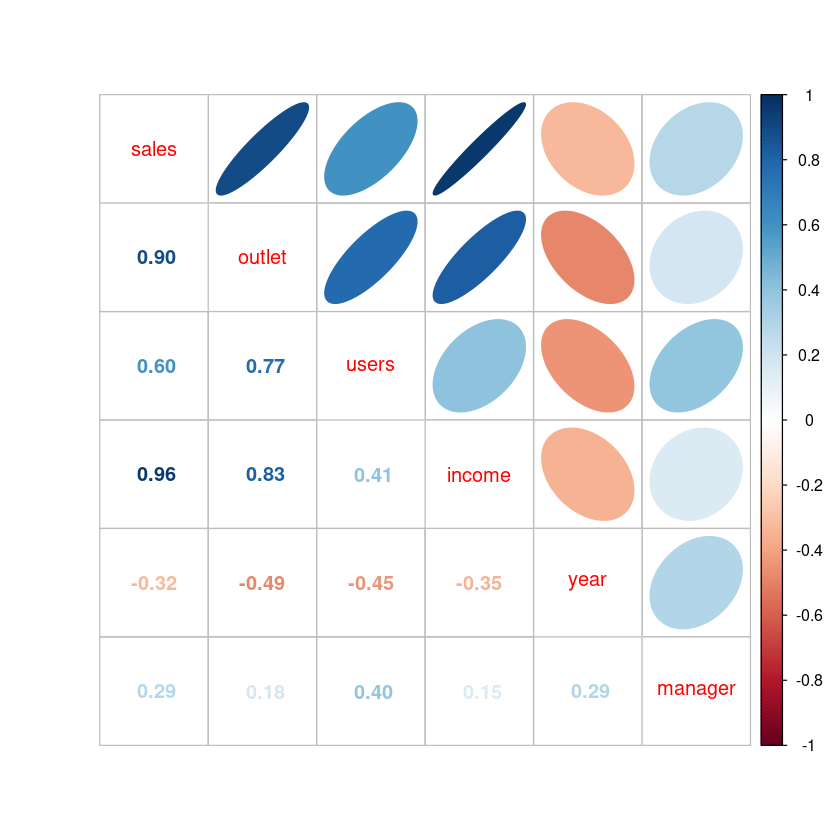

In [5]:
cor <- cor(car)
corrplot.mixed(cor, upper='ellipse', lower='number') # 첫번째 줄만 보자 

In [6]:
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))
plot(m4)
par(.opar)

ERROR: Error in plot(m4): 객체 'm4'를 찾을 수 없습니다


In [ ]:
m2 <- lm(sales~., car2)
summary(m2)
# pr(>|t|) : income, users

car3 <- car[, 1:4]
m3 <- lm(sales~., car3)
sumary(m3)
vif(3)

In [ ]:
car4 <- car[, c(1, 3:4)]
m4 <- lm(sales~., car4)
summary(m4)

* 단계적 회귀법, 단계적 변수 선택법
 + 전진소거법, 후진소거법, 최적소거법,
* 전진소거법 : 중요도가 높은 변수를 하나씩 추가해가며     회귀식을 작성
* 후진소거법 : 중요도가 낮은 변수를 하나씩 제거해가며 회귀식을 작성
* 최적소거법 : 전진/후진 소거법을 적절히 조합.

# houses.txt 를 이용해서
# 모든 독립변수를 전진/후진/최적 소거법을 이용해서
# 적절한 회귀방정식을 작성하세요

* 이렇게 변수를 하나씩 추가/제거해가며
   유의미한 독립변수를 찾는 것은 다소 불편함 
* 더구나 변수의 갯수가 많아지면 시간도 많이 걸림
# step 함수를 이용하면 간편하게 해결 가능
+ => step(회귀모델, 변수범위, 소거종류

In [ ]:
* 소거법을 이용해서 만들어진 회귀모형에 대한 성능평가를 AIC를 이용함
  + akaike information criterion
  

In [ ]:
houses = read.csv('houses.txt')

In [ ]:
# 적절한 회귀방정식을 작성하세요
# step(회귀모델, 변수범위, 소거종류)
# 전진소거법
houses(head)

In [ ]:
step(lm(난방비~1, data=houses), 
     scope=list(lower=1,
                upper=~평균외부기온+단열재+난방사용연수),
     direction='forward')

In [ ]:
summary(lm(난방비~., data=houses),direction='backward') 

# step 함수 결과 : 평균외부기온+단열재+난방사용연수
# '난방사용연수'를 제외시켰을떄 AIC의 극적 변화는 미비
   ==> 제외가능

In [7]:
# 최적소거법
step(lm(난방비~1, data=houses), 
     scope=list()
     direction='backward')

ERROR: Error in parse(text = x, srcfile = src): <text>:4:6: 예상하지 못한 기호(symbol)입니다.
3:      scope=list()
4:      direction
        ^


In [8]:
# 최종적으로 집값에 영향을 주는 요인은?

library(MASS)
?Boston

Boston {MASS},R Documentation


In [9]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


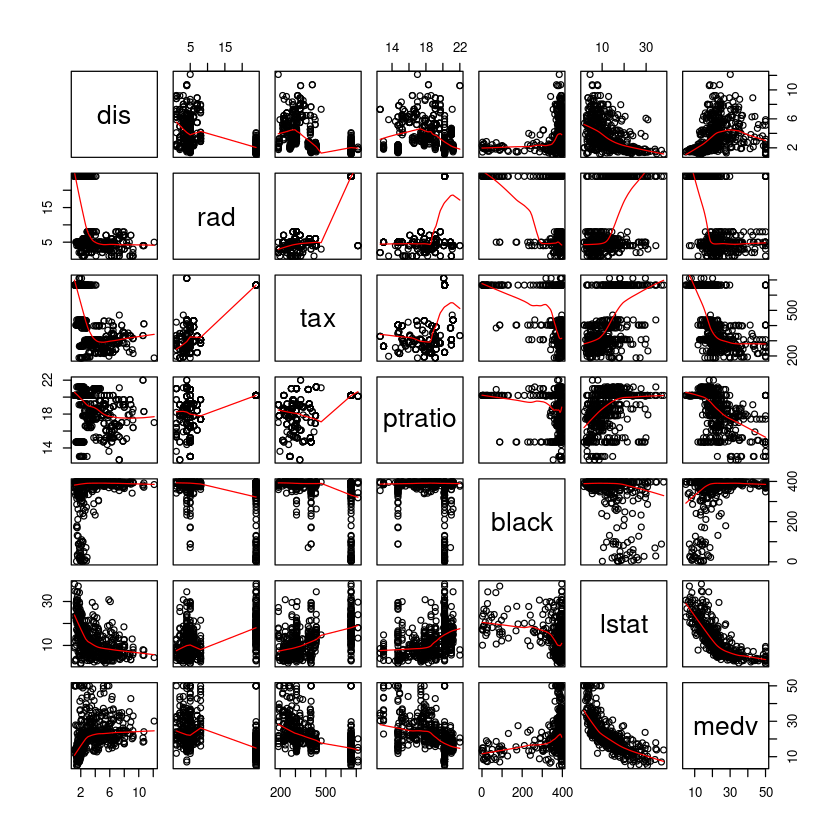

In [10]:
pairs(Boston[,c(8:13, 14)], panel=panel.smooth)

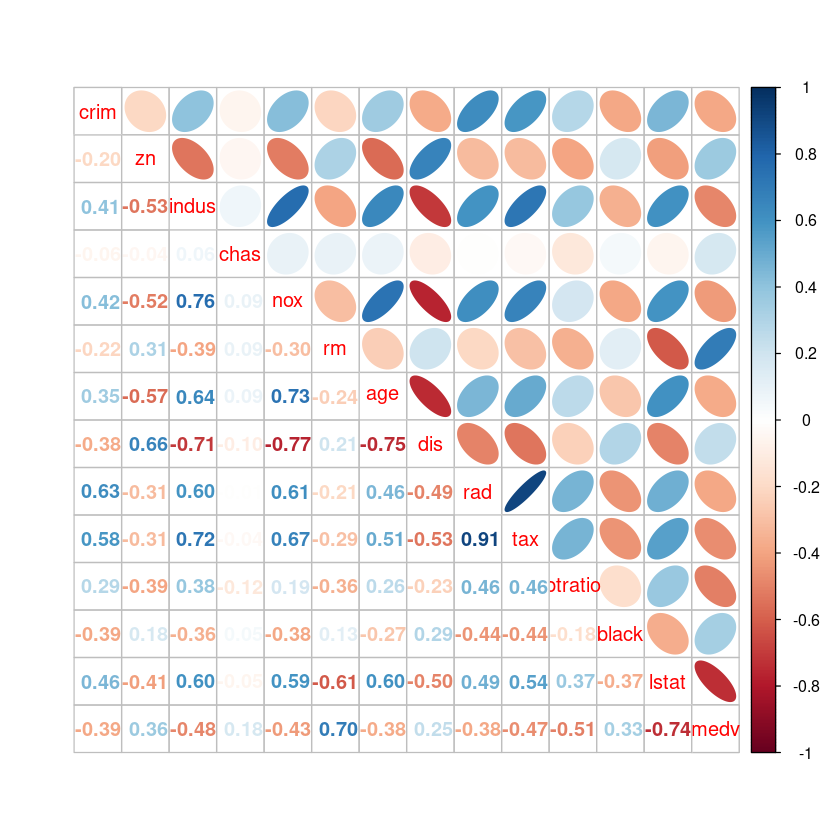

In [11]:
cor <- cor(Boston)
corrplot.mixed(cor, 
               upper='ellipse', lower='number')

In [12]:
m <-lm(medv~., Boston)

In [13]:
summary(m)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

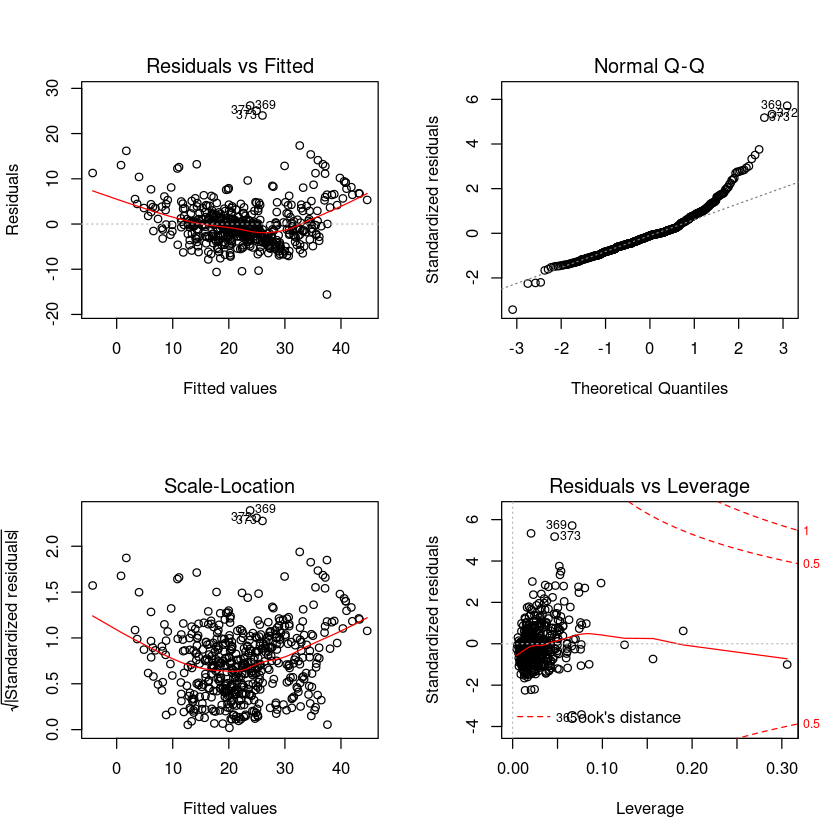

In [14]:
# Adjusted R-squared : 0.7338
# p-value: < 2.2e-16
#Pr(>|t|_ : indus, age 만 제외 
# 모든 회귀계수는 유의함 
# 
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))
plot(m)
par(.opar)


In [15]:
## 몇몇 이상치로 인해 레버레지 인해 레버레지 효과가 보이지만
## 선형성/정규성/등분산성/독립성에는 다소 문제가 없어 보임
# 수동 변수 최적화
#먼저 모델을 만드는데 아무것도 없는 상태에서 수동으로 추가해보자. 후진소거법.
lm(mdev~., Boston)
summary(m) 
# ==> indus, age 계수가 유의확률이 낮음 => 제거

m <- lm(medv~. -induse-age, Boston)
summary(m)
# ==> crim, chas 계수가 유의확률이 낮음 => 제거, 0.348

m <- lm(medv~. -indus-age-crim-chas, Boston)
summary(m) 0.724

m <- lm(medv~. -indus-age-crim-chas, Boston)
summary(m)
# ==> 0.724 : zn


ERROR: Error in parse(text = x, srcfile = src): <text>:14:12: 예상하지 못한 수치형 상수(numeric constant)입니다.
13: m <- lm(medv~. -indus-age-crim-chas, Boston)
14: summary(m) 0.724
               ^


In [ ]:
m <- lm(medv~. -indus-age-crinm-chas-zn-tax, Boston)
summary(m)
# => 0.713 에서 얼마? 간단하게 만들었을땐 어떻게 되요? 조금의 그 뭐죠? 손해라고 하기엔 그래도 다시 정리하다면 결정계수를 낮추는 선회를 감수하더라도 방정식을 깔끔하게 만들 수 있다면 감수할만 하죠!